In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("mtcars.csv")

In [4]:
data.shape

(32, 12)

In [5]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
data.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


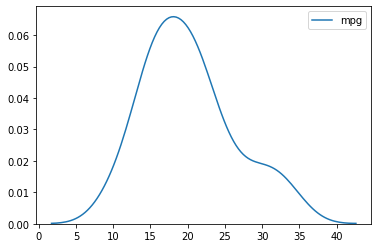

In [8]:
sns.kdeplot(data.mpg)
plt.show()

In [9]:
#full model

In [10]:
x = data.drop(['model','mpg'],axis=1)
y = data.mpg

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x, y)}')

Coefficients: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
Intercept: 12.303374155996305
R^2 score: 0.8690157644777647


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [13]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')

R^2 score for train: 0.9180757361688419
R^2 score for test: 0.6986516223548618


In [14]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     12.33
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           0.000130
Time:                        19:45:22   Log-Likelihood:                -34.185
No. Observations:                  22   AIC:                             90.37
Df Residuals:                      11   BIC:                             102.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5213     16.450      0.761      0.463     -23.685      48.728
cyl            0.0564      0.869      0.065      0.949      -1.857       1.970
disp           0.0091      0.014      0.656      0.525      -0.021       0.040
hp            -0.0192      0.017     -1.160      0.271      -0.056       0.017
drat           1.2695      1.789      0.710      0.493      -2.669       5.208
wt            -2.2950      1.365     -1.682      0.121      -5.298       0.708
qsec           0.2244      0.541      0.414      0.687      -0.967       1.416
vs            -0.8583      1.506     -0.570      0.580      -4.174       2.457
am            -0.4643      1.535     -0.303      0.768      -3.842       2.913
gear           2.5775      1.373      1.877      0.087      -0.445       5.600
carb          -0.8783      0.697     -1.260      0.234      -2.413       0.656
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.491
Skew:                           0.226   Prob(JB):                        0.782
Kurtosis:                       2.425   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,drat,wt,vs,am,carb
vif,2.819276,3.397915,1.937071,2.905688,1.828083


In [22]:
x = data.drop(['model','mpg','disp'],axis=1)
y = data.mpg
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     14.33
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           3.95e-05
Time:                        19:46:40   Log-Likelihood:                -34.608
No. Observations:                  22   AIC:                             89.22
Df Residuals:                      12   BIC:                             100.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2540     16.018      0.827      0.424     -21.646      48.154
cyl            0.1332      0.841      0.158      0.877      -1.698       1.965
hp            -0.0124      0.013     -0.984      0.344      -0.040       0.015
drat           1.3290      1.744      0.762      0.461      -2.471       5.129
wt            -1.5862      0.814     -1.949      0.075      -3.359       0.187
qsec           0.1148      0.503      0.228      0.823      -0.980       1.210
vs            -1.1241      1.416     -0.794      0.443      -4.210       1.961
am            -0.6410      1.475     -0.435      0.671      -3.854       2.572
gear           2.6570      1.335      1.990      0.070      -0.252       5.566
carb          -1.1622      0.533     -2.179      0.050      -2.325       0.000
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.735
Skew:                           0.298   Prob(JB):                        0.692
Kurtosis:                       2.331   Cond. No.                     7.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,cyl,hp,drat,wt,qsec,vs,am,gear,carb
vif,17.920204,5.971789,5.336429,4.326277,7.048845,4.273975,4.435717,7.693761,7.180276


In [24]:
x = data.drop(['model','mpg','disp','cyl'],axis=1)
y = data.mpg
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     17.42
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           9.03e-06
Time:                        19:46:41   Log-Likelihood:                -34.631
No. Observations:                  22   AIC:                             87.26
Df Residuals:                      13   BIC:                             97.08
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2631      9.415      1.621      0.129      -5.078      35.604
hp            -0.0120      0.012     -1.010      0.331      -0.038       0.014
drat           1.2100      1.514      0.799      0.439      -2.061       4.481
wt            -1.5662      0.773     -2.026      0.064      -3.237       0.104
qsec           0.0811      0.438      0.185      0.856      -0.865       1.027
vs            -1.2139      1.248     -0.972      0.349      -3.911       1.483
am            -0.7213      1.332     -0.542      0.597      -3.599       2.156
gear           2.5726      1.177      2.185      0.048       0.029       5.116
carb          -1.1290      0.472     -2.393      0.032      -2.148      -0.110
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.746
Skew:                           0.286   Prob(JB):                        0.689
Kurtosis:                       2.302   Cond. No.                     4.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,hp,drat,wt,qsec,vs,am,gear,carb
vif,5.787999,4.347095,4.221395,5.782654,3.590149,3.912369,6.46789,6.069146


In [26]:
x = data.drop(['model','mpg','disp','cyl','gear'],axis=1)
y = data.mpg
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     15.15
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           1.52e-05
Time:                        19:46:43   Log-Likelihood:                -38.072
No. Observations:                  22   AIC:                             92.14
Df Residuals:                      14   BIC:                             100.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0546     10.601      1.514      0.152      -6.683      38.792
hp            -0.0141      0.013     -1.056      0.309      -0.043       0.015
drat           2.6284      1.541      1.705      0.110      -0.677       5.934
wt            -2.0419      0.836     -2.442      0.028      -3.835      -0.249
qsec           0.2520      0.485      0.519      0.612      -0.789       1.293
vs            -1.1038      1.405     -0.785      0.445      -4.118       1.911
am             0.4577      1.372      0.334      0.744      -2.485       3.401
carb          -0.4744      0.411     -1.155      0.267      -1.355       0.406
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.083
Skew:                           0.406   Prob(JB):                        0.582
Kurtosis:                       2.278   Cond. No.                     4.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,hp,drat,wt,qsec,vs,am,carb
vif,5.750314,3.548036,3.886767,5.59806,3.584299,3.270481,3.621796


In [28]:
x = data.drop(['model','mpg','disp','cyl','gear','hp'],axis=1)
y = data.mpg
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     17.35
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           5.69e-06
Time:                        19:46:52   Log-Likelihood:                -38.916
No. Observations:                  22   AIC:                             91.83
Df Residuals:                      15   BIC:                             99.47
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0997      9.013      1.121      0.280      -9.110      29.310
drat           3.2762      1.419      2.308      0.036       0.251       6.301
wt            -2.2863      0.806     -2.835      0.013      -4.005      -0.567
qsec           0.4252      0.459      0.927      0.369      -0.552       1.403
vs            -1.1843      1.409     -0.841      0.414      -4.187       1.818
am             0.4988      1.377      0.362      0.722      -2.436       3.433
carb          -0.7133      0.344     -2.073      0.056      -1.447       0.020
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.978
Skew:                           0.516   Prob(JB):                        0.613
Kurtosis:                       2.939   Cond. No.                         470.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,drat,wt,qsec,vs,am,carb
vif,2.986137,3.588953,4.959166,3.573766,3.267847,2.5227


In [30]:
x = data.drop(['model','mpg','disp','cyl','gear','hp','qsec'],axis=1)
y = data.mpg
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     20.83
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           1.73e-06
Time:                        19:46:53   Log-Likelihood:                -39.529
No. Observations:                  22   AIC:                             91.06
Df Residuals:                      16   BIC:                             97.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3539      5.950      2.748      0.014       3.740      28.968
drat           3.5873      1.373      2.613      0.019       0.677       6.498
wt            -2.1138      0.781     -2.706      0.016      -3.770      -0.458
vs            -0.3004      1.033     -0.291      0.775      -2.489       1.889
am             0.0738      1.293      0.057      0.955      -2.666       2.814
carb          -0.8806      0.292     -3.020      0.008      -1.499      -0.263
==============================================================================
Omnibus:                        0.646   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.421
Skew:                           0.322   Prob(JB):                        0.810
Kurtosis:                       2.792   Cond. No.                         99.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,drat,wt,vs,am,carb
vif,2.819276,3.397915,1.937071,2.905688,1.828083


- As we donot have more feature variables, it is not possible to continue further to prepare model.